In [5]:
import openslide, zarr, pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import PIL, PIL.Image as Image
PIL.Image.MAX_IMAGE_PIXELS = None

In [16]:
data_split = pkl.load(open('/local/scratch/clmn1/octree_study/Experiments/aggc_22_OctreeNCA/data_split.dt', 'rb'))

In [20]:
data_split.images

{'train': {'Subset1_Train_63.tiff': {'640_3200': ('Subset1_Train_63.tiff',
    640,
    3200),
   '640_3520': ('Subset1_Train_63.tiff', 640, 3520),
   '640_3840': ('Subset1_Train_63.tiff', 640, 3840),
   '960_2880': ('Subset1_Train_63.tiff', 960, 2880),
   '960_3200': ('Subset1_Train_63.tiff', 960, 3200),
   '960_3520': ('Subset1_Train_63.tiff', 960, 3520),
   '960_3840': ('Subset1_Train_63.tiff', 960, 3840),
   '1280_2880': ('Subset1_Train_63.tiff', 1280, 2880),
   '1280_3200': ('Subset1_Train_63.tiff', 1280, 3200),
   '1280_3520': ('Subset1_Train_63.tiff', 1280, 3520),
   '1280_3840': ('Subset1_Train_63.tiff', 1280, 3840),
   '1280_4160': ('Subset1_Train_63.tiff', 1280, 4160),
   '1600_2560': ('Subset1_Train_63.tiff', 1600, 2560),
   '1600_2880': ('Subset1_Train_63.tiff', 1600, 2880),
   '1600_3200': ('Subset1_Train_63.tiff', 1600, 3200),
   '1600_3520': ('Subset1_Train_63.tiff', 1600, 3520),
   '1600_3840': ('Subset1_Train_63.tiff', 1600, 3840),
   '1600_4160': ('Subset1_Train_63.ti

In [127]:
img = openslide.OpenSlide("/local/scratch/AGGC/AGGC2022_train/Subset1_Train_image/Subset1_Train_19.tiff")
lbl = zarr.open("/local/scratch/clmn1/data/AGGC3/AGGC2022_train/Subset1_Train_annotations/Subset1_Train_19/Stroma_Mask.zarr")
print(img.level_dimensions[0])
assert img.level_dimensions[0] == lbl.shape

x, y = 14000, 30000
patch_size = 8000

img = img.read_region((y, x), 0, (patch_size, patch_size // 2))
lbl = lbl[x:x+patch_size, y:y+patch_size // 2]

(46080, 90720)


In [114]:
np.count_nonzero(lbl) / (patch_size*patch_size)

0.10303040625

In [125]:
lbl = np.swapaxes(lbl, 0, 1)

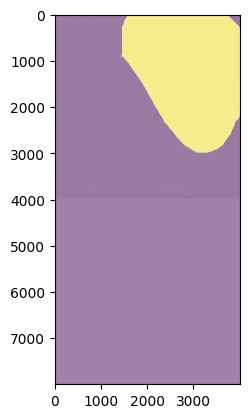

In [128]:
plt.imshow(img)
plt.imshow(lbl, alpha=0.5)

In [165]:
img = zarr.open("/local/scratch/clmn1/data/AGGC4/AGGC2022_train/Subset1_Train_image/Subset1_Train_61.zarr")
lbl = zarr.open("/local/scratch/clmn1/data/AGGC4/AGGC2022_train/Subset1_Train_annotations/Subset1_Train_61/Stroma_Mask.zarr")

x, y = 5300, 20000
patch_size = 8000

img = img[x:x+patch_size, y:y+patch_size]
lbl = lbl[x:x+patch_size, y:y+patch_size]

In [ ]:
img = zarr.open("/local/scratch/clmn1/data/AGGC4/AGGC2022_train/Subset1_Train_image/Subset1_Train_61.zarr")
for x in range(0, img.shape[0], patch_size):
    for y in range(0, img.shape[1], patch_size):
        lbl = zarr.open("/local/scratch/clmn1/data/AGGC4/AGGC2022_train/Subset1_Train_annotations/Subset1_Train_61/Stroma_Mask.zarr")
        lbl = lbl[x:x+patch_size, y:y+patch_size]
        print(x,y, np.count_nonzero(lbl))

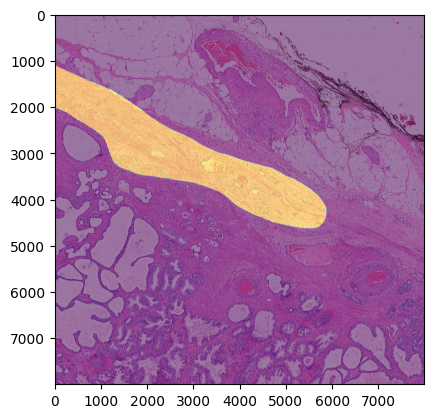

In [166]:
plt.imshow(img)
plt.imshow(lbl, alpha=0.5)

In [7]:
img = Image.open("/local/scratch/AGGC/AGGC2022_train/Subset1_Train_image/Subset1_Train_96.tiff")

In [8]:
img

JPEGLib: Not a JPEG file: starts with 0x00 0x4d.
Maximum supported image dimension is 65500 pixels


<PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=46080x87120>

In [9]:
import tifffile

In [13]:
img = Image.open("/local/scratch/BCSS/BCSS_TIF/masks/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0.2300.tif")

In [19]:
np.unique(img, return_counts=True)

(array([1, 2, 3, 4, 9], dtype=uint8),
 array([8774290, 4273903,   12671, 5686721,   92815]))

In [21]:
np.count_nonzero(img) / (img.shape[0]*img.shape[1])

1.0